In [76]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from datetime import datetime as dt, timedelta
sns.set_theme(style="darkgrid")


In [3]:
df = pd.read_excel('data.xlsx')

In [4]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,No,Online
1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,No,Online
2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,No,Cards
3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,No,Online
4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,No,Online


## Sales perfomance

In [5]:
sales_categorie = df.groupby('Category').agg({
    'Sales': 'sum',
    'Quantity': 'sum',  
    'Profit': 'sum'
})


In [6]:
sales_categorie = sales_categorie.reset_index()

In [7]:
sales_categorie

,Category,Sales,Quantity,Profit
0,Furniture,451508.6452,4631,10006.6112
1,Office Supplies,643707.6870,13625,74797.2461
2,Technology,470587.9910,4061,90458.2486


In [8]:
for col in ['Sales','Quantity','Profit'] :
    fig = px.bar(sales_categorie,
                 x='Category',
                 y=col,
                 title= f"Category {col}",
                 color= 'Category'
                 )
    fig.update_layout(
        xaxis = dict(showgrid=False),
        yaxis = dict(showgrid=False)

    )
    fig.show()

In [9]:
Segment_Sales = df.groupby('Segment')[['Sales','Profit','Quantity']].sum().reset_index()


In [10]:
Segment_Sales

,Segment,Sales,Profit,Quantity
0,Consumer,753002.1291,81338.5875,11199
1,Corporate,509743.1262,57805.7991,6865
2,Home Office,303059.0679,36117.7193,4253


In [11]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Sales', 'Profit', 'Quantity'), specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]])
for i,col in enumerate (['Sales','Profit','Quantity']):
    fig.add_trace(go.Pie(labels =Segment_Sales['Segment'],values =Segment_Sales[col] ,name =f"segment : {col}" 
                         ),row=1,
                  col=i+1)
fig.show()




In [12]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
df.set_index('Order Date',inplace=True)

In [14]:
df.sort_index(ascending = True)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
Order Date,,,,,,,,,,,,,,,,,,,
2019-01-01,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,No,Online
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,No,Online
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,No,Cards
2019-01-03,CA-2019-125206,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,No,Online
2019-01-03,US-2019-116365,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,No,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,CA-2020-143259,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,No,COD
2020-12-30,CA-2020-115427,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,Yes,Online
2020-12-30,CA-2020-156720,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,No,Online


In [15]:
df_line = df[(df.index < '2020-01-01') & (df.index > '2019-01-01')]
mean_sales = df['Quantity'].mean()
max_sales = df['Quantity'].max()

In [16]:
df_line.head(5)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
Order Date,,,,,,,,,,,,,,,,,,,
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,No,Online
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,No,Cards
2019-01-03,CA-2019-125206,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,No,Online
2019-01-03,US-2019-116365,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,No,Online
2019-01-03,US-2019-116365,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.60,3,-6.2100,No,Online


In [17]:
fig = px.line(df_line,
              x=df_line.index,
              y='Quantity',
              line_shape='spline',
              )
fig.add_hline(y=mean_sales, line_dash="dash", line_color="red", annotation_text="Average Sales")
fig.add_hline(y=max_sales, line_dash="dash", line_color="green", annotation_text=" Sales")
fig.show()

In [18]:
Sales_time = df.groupby(df.index.date)[['Sales','Quantity','Profit']].sum()

In [19]:
df['year'] = df.index.year

In [20]:
df

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,year
Order Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,No,Online,2019
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,No,Online,2019
2019-01-02,CA-2019-160304,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,No,Cards,2019
2019-01-03,CA-2019-125206,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,No,Online,2019
2019-01-03,US-2019-116365,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,No,Online,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,CA-2020-143259,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,No,COD,2020
2020-12-30,CA-2020-115427,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,Yes,Online,2020
2020-12-30,CA-2020-156720,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,No,Online,2020


In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,
    y=df.Sales,
    mode = 'lines'
))
fig.show()

<Axes: xlabel='Ship Mode', ylabel='Quantity'>

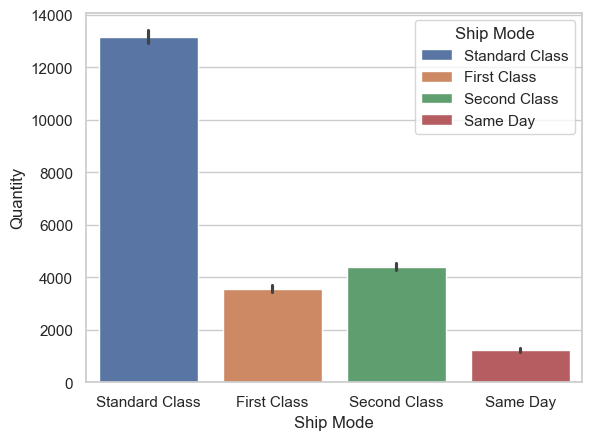

In [22]:
sns.barplot(estimator=sum,
            data=df,
            x='Ship Mode',
            y='Quantity',
            hue = 'Ship Mode',
            legend=True
            
            )

<Axes: xlabel='Payment Mode', ylabel='Sales'>

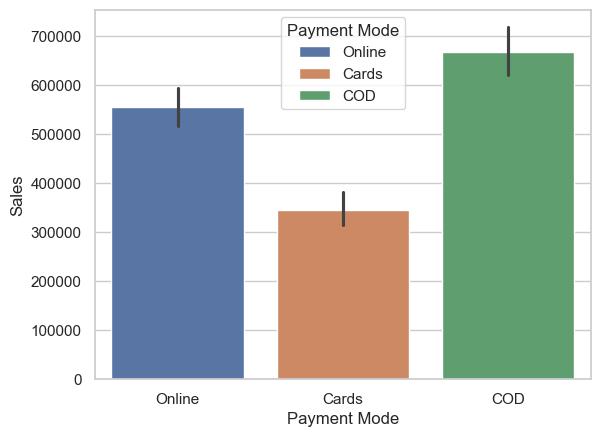

In [23]:

sns.barplot(data=df,
            x='Payment Mode',
            y='Sales',
            estimator='sum',
            hue='Payment Mode',
            legend=True
            )

# RFM model

In [24]:
df1 = df

In [25]:
df1.dropna(subset='Customer ID',inplace=True)

In [26]:
Ref_dt = df1['Ship Date'].max() + timedelta(days=1)
print(Ref_dt)

2021-01-06 00:00:00


In [27]:
df1['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [28]:
RFM = df1.groupby('Customer Name').agg({
    'Ship Date':lambda x : (Ref_dt-x.max()).days,
    'Sales':'sum',
    'Customer ID':'count'
    
})
RFM.rename(columns ={'Ship Date':'Recency',
                     'Sales':'Monetory',
                     'Customer ID':'Frequency'},inplace=True)

In [29]:
quantiles = RFM.quantile(q=[0.25, 0.5, 0.75])

#RFM score 
def RScore(x,p,d):
    if p == "Recency":
        if x <= d[p][0.25]:
            return 4 
        elif x <= d[p][0.5]:
            return 3
        elif x <= d[p][0.75]:
            return 3
        else :
            return 1 
    else :
        if x <= d[p][0.25]:
                return 1 
        elif x <= d[p][0.5]:
                return 2
        elif x <= d[p][0.75]:
                return 3
        else :
            return 4
        
RFM['R']= RFM['Recency'].apply(RScore,args=['Recency',quantiles,])        
RFM['F']= RFM['Frequency'].apply(RScore,args=['Frequency',quantiles,])
RFM['M']= RFM['Monetory'].apply(RScore,args=['Monetory',quantiles,])

In [30]:
RFM.head()

,Recency,Monetory,Frequency,R,F,M
Customer Name,,,,,,
Aaron Bergman,421,563.940,2,1,1,1
Aaron Hawkins,15,429.154,2,4,1,1
Aaron Smayling,90,3368.912,9,3,3,4
Adam Bellavance,54,8167.080,17,3,4,4
Adam Hart,37,3900.109,18,3,4,4


In [38]:
RFM['RFM_segment']= RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str) 
RFM.head(5)

,Recency,Monetory,Frequency,R,F,M,RFM_segment
Customer Name,,,,,,,
Aaron Bergman,421,563.940,2,1,1,1,111
Aaron Hawkins,15,429.154,2,4,1,1,411
Aaron Smayling,90,3368.912,9,3,3,4,334
Adam Bellavance,54,8167.080,17,3,4,4,344
Adam Hart,37,3900.109,18,3,4,4,344


In [36]:
RFM.drop('RFM_segmen',axis=1,inplace=True)

In [39]:
RFM["RFM_score"] = RFM[['R','F','M']].sum(axis=1)

In [40]:
RFM.loc[RFM['RFM_score'] >= 9, 'segment'] = 'high'
RFM.loc[(RFM['RFM_score'] >= 4) & (RFM['RFM_score'] < 9),'segment'] = "Meduim"
RFM.loc[RFM['RFM_score'] < 4 ,'segment'] = 'Low'


In [41]:
RFM

,Recency,Monetory,Frequency,R,F,M,RFM_segment,RFM_score,segment
Customer Name,,,,,,,,,
Aaron Bergman,421,563.940,2,1,1,1,111,3,Low
Aaron Hawkins,15,429.154,2,4,1,1,411,6,Meduim
Aaron Smayling,90,3368.912,9,3,3,4,334,10,high
Adam Bellavance,54,8167.080,17,3,4,4,344,11,high
Adam Hart,37,3900.109,18,3,4,4,344,11,high
...,...,...,...,...,...,...,...,...,...
Xylona Preis,47,1797.694,15,3,4,3,343,10,high
Yana Sorensen,12,5956.264,7,4,2,4,424,10,high
Yoseph Carroll,11,2635.160,4,4,1,3,413,8,Meduim


In [42]:
seg_count = RFM['segment'].value_counts().reset_index()

In [43]:

seg_count

,segment,count
0,Meduim,383
1,high,318
2,Low,72


In [44]:
fig = px.bar(seg_count,
             x='segment',
             y='count',
             color='segment',
             title = 'segment distribution',
             labels = "Customer segment , Value Count",
             color_discrete_sequence = px.colors.qualitative.Pastel)
            

fig.update_layout(
    xaxis = dict(showgrid=False),
    yaxis = dict(showgrid=False)
)
fig.show()

In [54]:

RFM['Quality'] = None
RFM.loc[RFM['RFM_score'] >= 9 , 'Quality'] = 'VIP'
RFM.loc[(RFM['RFM_score'] >= 7) & (RFM['RFM_score'] < 9), 'Quality'] = 'Potential Loyalist'
RFM.loc[(RFM['RFM_score'] >= 5) & (RFM['RFM_score'] < 7), 'Quality'] = 'Frequent Buyer'
RFM.loc[(RFM['RFM_score'] >= 3) & (RFM['RFM_score'] < 5), 'Quality'] = 'Regular Customer'
RFM.loc[(RFM['RFM_score'] >= 3) & (RFM['RFM_score'] < 5), 'Quality'] = 'At-Risk Client'
RFM.loc[(RFM['RFM_score'] >= 1) & (RFM['RFM_score'] < 3), 'Quality'] = 'Inactive Client'

In [55]:
RFM

,Recency,Monetory,Frequency,R,F,M,RFM_segment,RFM_score,segment,Quality
Customer Name,,,,,,,,,,
Aaron Bergman,421,563.940,2,1,1,1,111,3,Low,At-Risk Client
Aaron Hawkins,15,429.154,2,4,1,1,411,6,Meduim,Frequent Buyer
Aaron Smayling,90,3368.912,9,3,3,4,334,10,high,VIP
Adam Bellavance,54,8167.080,17,3,4,4,344,11,high,VIP
Adam Hart,37,3900.109,18,3,4,4,344,11,high,VIP
...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,47,1797.694,15,3,4,3,343,10,high,VIP
Yana Sorensen,12,5956.264,7,4,2,4,424,10,high,VIP
Yoseph Carroll,11,2635.160,4,4,1,3,413,8,Meduim,Potential Loyalist


In [56]:
RFM['Quality'].value_counts()

Quality
VIP                   318
Potential Loyalist    176
Frequent Buyer        175
At-Risk Client        104
Name: count, dtype: int64

In [61]:
Quality_count = RFM['Quality'].value_counts().reset_index()
Quality_count

,Quality,count
0,VIP,318
1,Potential Loyalist,176
2,Frequent Buyer,175
3,At-Risk Client,104


In [68]:
fig = px.bar(Quality_count,
             x='Quality',
             y='count',
             color = 'Quality',
             title= 'customer behvior segements',
             labels='number of client ,behavior segment',
             color_discrete_sequence = px.colors.qualitative.Pastel
             
             )
fig.update_layout(
    xaxis = dict(showgrid=False),
    yaxis = dict(showgrid=False)
)


fig.show()

<Axes: xlabel='Quality', ylabel='Monetory'>

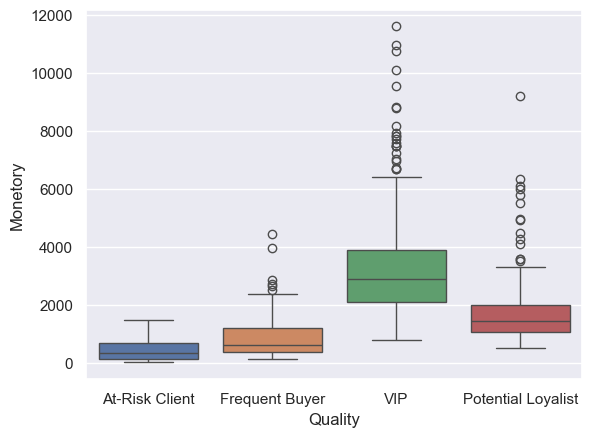

In [80]:
sns.boxplot(data=RFM,x="Quality",y="Monetory",hue="Quality")

<Axes: xlabel='Quality', ylabel='Recency'>

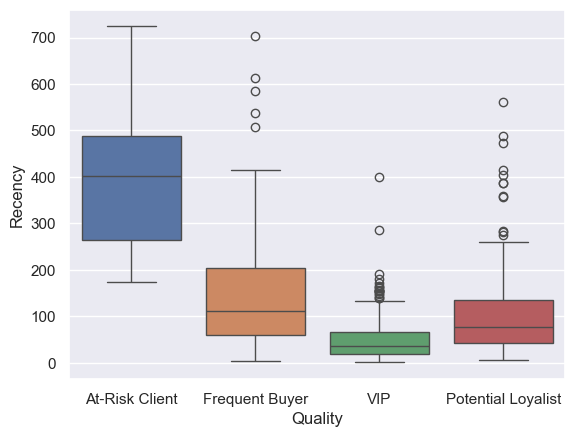

In [79]:
sns.boxplot(data=RFM,x="Quality",y="Recency",hue="Quality")